In [1]:
#IMPORTS
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import matplotlib.pyplot as plt
import seaborn as sns
import random

%matplotlib inline

In [2]:
#PARAMETERS
SEED = 2020
np.random.seed(SEED)
random.seed(SEED)

numInput = 100
numFeatures = 4

In [3]:
#DATA GENERATION
data = np.random.random((numInput,numFeatures+1))
data[:(numInput//2),4] = 0
data[(numInput//2):,4] = 1
np.random.shuffle(data)

df = pd.DataFrame(data, columns= ['Feature'+str(i) for i in range(1,5)]+['label'])
df.to_csv("RandomDataSet.csv", index=False)

In [4]:
#part i. Read the dataset from file
df = pd.read_csv('RandomDataSet.csv')
df.head(n=10) , df.tail(n=10)

(   Feature1  Feature2  Feature3  Feature4  label
 0  0.765024  0.775310  0.079665  0.671696    1.0
 1  0.079006  0.692247  0.099327  0.724138    1.0
 2  0.188556  0.726413  0.096407  0.833940    1.0
 3  0.576548  0.177279  0.994459  0.117375    0.0
 4  0.970833  0.045101  0.905547  0.743335    1.0
 5  0.255777  0.096626  0.106327  0.029901    1.0
 6  0.153506  0.757515  0.407065  0.810765    1.0
 7  0.967956  0.072424  0.102449  0.322625    1.0
 8  0.602063  0.121256  0.396070  0.600806    0.0
 9  0.420683  0.586431  0.431606  0.240137    1.0,
     Feature1  Feature2  Feature3  Feature4  label
 90  0.014027  0.871687  0.902407  0.449204    0.0
 91  0.874861  0.842372  0.067810  0.310195    0.0
 92  0.958978  0.279028  0.730804  0.199917    0.0
 93  0.318047  0.246836  0.838455  0.084035    0.0
 94  0.945541  0.762135  0.328678  0.925958    0.0
 95  0.156165  0.636894  0.555696  0.191929    0.0
 96  0.216954  0.276477  0.343316  0.862159    0.0
 97  0.048394  0.564320  0.936032  0.8030

In [5]:
data = df.to_numpy()
X = data[:,:-1]
y = data[:,-1]

In [6]:
#ii. Split the data into train and test. Ensure the data is split in the same way every time the program runs.
spl = 0.2
N = len(data)
sample = int(spl*N)

#shuffle the whole matrix data and then split
np.random.shuffle(data)
X_train, X_test, y_train, y_test = X[:75,:], X[75:, :], y[:75, ], y[75:,]

In [7]:
print(X_train.shape , X_test.shape)

(75, 4) (25, 4)


In [8]:
#iii. Initialise the weights of the perceptron, learning rate and epochs
weights = np.random.randn((numFeatures+1))  ## 1 for bias
epoch = 1000
learning_rate = 0.1

In [9]:
#iv. Define the activation function
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [10]:
# sigmoid(np.asarray([5,7]))

In [11]:
#v. Train the model i.e. Learn the weights of the perceptron on the training data.
X_train.shape , weights[1:].shape , (X_train@weights[1:] + weights[0]).shape

((75, 4), (4,), (75,))

In [12]:
def predict(X):
  return sigmoid(X@weights[1:] + weights[0])

In [13]:
def train(X_train, y_train):
  for _ in range(epoch):
    prediction = predict(X_train)
    weights[1:] += learning_rate * ( (y_train - prediction) @ X_train )
    weights[0] += learning_rate * np.sum(y_train - prediction)
    

In [14]:
train(X_train, y_train)

In [15]:
#vi. Print the learned weights and the hyperparameters (epoch and learning rate)
print("Weights = " , weights)
print("Epochs = " , epoch)
print("Learning Rate = " , learning_rate)

Weights =  [ 1.4092323  -1.71853591 -1.09317556 -6.59606131  1.29595199]
Epochs =  1000
Learning Rate =  0.1


In [16]:
#vii. Predict the outputs on train and test data
def predictOutput(X):
  pred = predict(X)
  return (pred < 0.5).astype(int)

In [17]:
pred_train = predictOutput(X_train)
pred_test = predictOutput(X_test)


In [18]:
#viii. Print the confusion matrix, accuracy, precision, recall on train and test data
np.sum((pred_train == y_train) & (y_train == 1))

35

In [19]:
def printStats(testLabel, predicted):
  TP = np.sum((pred_train == y_train) & (y_train == 1))
  TN = np.sum((pred_train == y_train) & (y_train == 0))
  FP = np.sum((pred_train != y_train) & (y_train == 0))
  FN = np.sum((pred_train != y_train) & (y_train == 1))
  tot = TP + TN + FP + FN
  accuracy = (TP + TN) / tot
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)

  print("Accuracy = " , accuracy)
  print("Precision = " , precision)
  print("Recall = " , recall)
  

In [20]:
def ShowConfusionMatrix(testLabel, predicted):
    data = {'Actual Label': testLabel, 'Predicted Label': predicted}
    df = pd.DataFrame(data, columns=data.keys())
    confusion_matrix = pd.crosstab(df['Actual Label'], df['Predicted Label'], rownames=['Actual'], colnames=['Predicted'])
    plt.figure(figsize = (10,5))
    sns.heatmap(confusion_matrix, annot=True)

TRAIN STATS
Accuracy =  0.4666666666666667
Precision =  0.4861111111111111
Recall =  0.9210526315789473


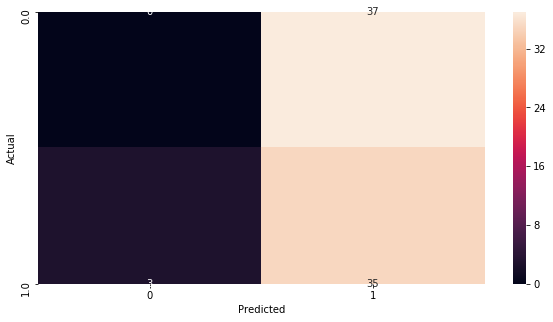

In [21]:
print("TRAIN STATS")
printStats(y_train , pred_train)
ShowConfusionMatrix(y_train , pred_train)

TEST STATS
Accuracy =  0.4666666666666667
Precision =  0.4861111111111111
Recall =  0.9210526315789473


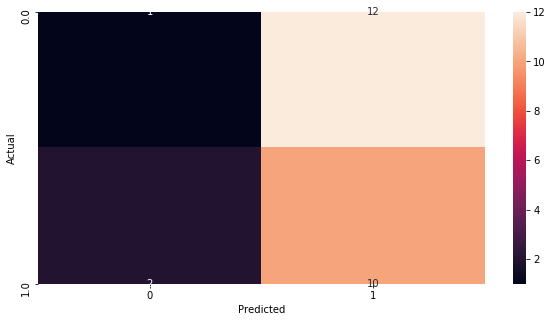

In [22]:
print("TEST STATS")
printStats(y_test , pred_test)
ShowConfusionMatrix(y_test , pred_test)